# FES projection on two CVs

Text(5, 50, '$\\alpha$')

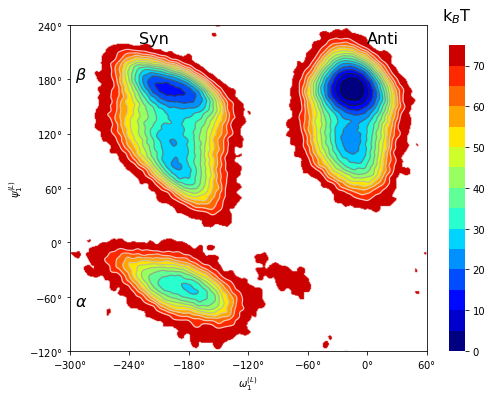

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm
from matplotlib.ticker import StrMethodFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

factor = 1/2.5 # convert kJ/mol to kT

x = np.genfromtxt('fes.dat', skip_header=9)[:,2]*factor
#x = np.rot90(np.reshape(x,(int(x.shape[0]**0.5),int(x.shape[0]**0.5))))
x = np.reshape(x,(int(x.shape[0]**0.5),int(x.shape[0]**0.5))).T
x = np.block([[x, x],[x, x]])
x = x[50:410,250:610]

custom_map = cm.get_cmap('jet')
newcolors = custom_map(np.linspace(0,1,16))
newcolors[-1,:]=[1, 1, 1, 1]
new_cmp = ListedColormap(newcolors)

in_lines=np.arange(0, 30, step=5)
out_lines=np.arange(30, 75, step= 5)
lines=np.append(in_lines, out_lines)

plt.figure(figsize=(8,6))
plt.pcolormesh(x, shading='gouraud', cmap=new_cmp, vmin=0, vmax=79.99)
cbar=plt.colorbar(drawedges=False)
#cbar=plt.colorbar(label="$\mathrm{k_BT}$", drawedges=False)
cbar.outline.set_visible(False)
plt.contour(x, lines, alpha=0.75,  cmap='gray', linewidths=1.25)

plt.xlabel('$\omega_1^{(L)}$')
plt.ylabel('$\psi_1^{(L)}$')

    
matplotlib.rcParams['font.size'] = 16
plt.text(375,365,r'k$_B$T')
#matplotlib.rcParams['xtick.labelsize'] = 16
#matplotlib.rcParams['ytick.labelsize'] = 16

plt.xticks(np.arange(0,361,60), ['$'+str(i)+ '\degree$' for i in range(0-300,361-300,60)])
plt.yticks(np.arange(0,361,60), ['$'+str(i)+ '\degree$' for i in range(0-120,361-120,60)])

#plt.xticks(np.arange(0,712,59),['$'+str(i)+ '\degree$' for i in range(0-180,721-180,60)], rotation=30, fontsize='16')
#plt.yticks(np.arange(0,712,59),['$'+str(i)+ '\degree$' for i in range(0-180,721-180,60)], rotation=0, fontsize='16')

plt.text(70,340,'Syn', color='k', fontsize=16)
plt.text(300,340,'Anti', color='k', fontsize=16)
plt.text(5,300,r'$\beta$', color='k', fontsize=16)
plt.text(5,50,r'$\alpha$', color='k', fontsize=16)
#plt.title('Bispidine-leucine-LD in CHCl3 (WT-metaD)')
#plt.savefig('ld_fes_psi_omega.jpg', dpi=300, bbox_inches='tight', facecolor='w')

## Populations

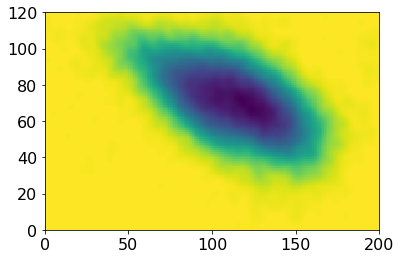

In [31]:
cis_alpha = x[0:120,0:200]
plt.pcolormesh(cis_alpha)

In [32]:
np.exp(-cis_alpha).sum()/np.exp(-x).sum()

4.246432965062425e-13

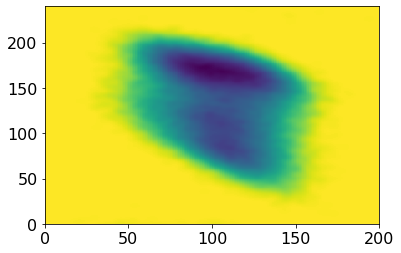

In [33]:
cis_beta = x[120:,0:200]
plt.pcolormesh(cis_beta)

In [34]:
np.exp(-cis_beta).sum()/np.exp(-x).sum()

5.542934998547108e-06

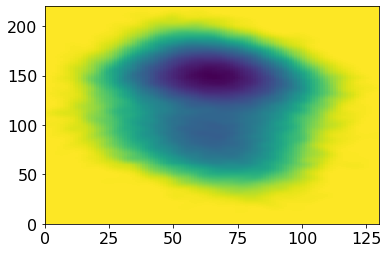

In [35]:
trans_beta = x[140:,220:-10]
plt.pcolormesh(trans_beta)

In [36]:
np.exp(-trans_beta).sum()/np.exp(-x).sum()

0.9999944570645767

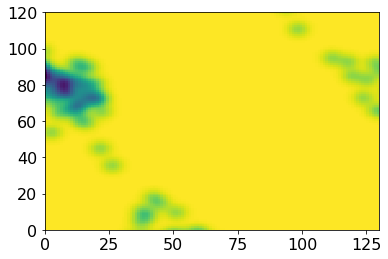

In [45]:
trans_alpha = x[0:120,220:-10]
plt.pcolormesh(trans_alpha)

In [46]:
np.exp(-trans_alpha).sum()/np.exp(-x).sum()

3.6887672700900544e-31

In [72]:
np.arange(0,361,60)-300

array([-300, -240, -180, -120,  -60,    0,   60])

In [79]:
np.arange(0,361,60)-180

array([-180, -120,  -60,    0,   60,  120,  180])

## psi at omega=0 (Trans)

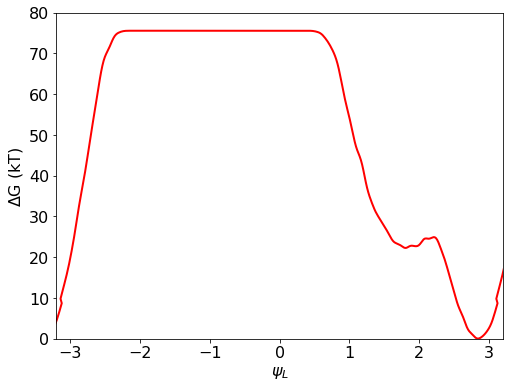

In [114]:
import numpy as np
import matplotlib.pyplot as plt

factor = 1/2.5 # convert kJ/mol to RT (310K)
x = np.genfromtxt('fes.dat', skip_header=9)

psi = x[:,0]
omega = x[:,1]
trans = np.where(omega == 0)
psi = psi[trans]

fe = x[:,2]*factor
fe = fe[trans]
psi_p = np.concatenate((psi-2*psi.max(),psi,psi+2*psi.max()))
fe = np.tile(fe,3)

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
plt.plot(psi_p,fe, color='red', linewidth=2)
plt.xlabel(r'$\psi_L$')
plt.ylabel(r'$\Delta$G (kT)')
#plt.title('Trans- LD Leucine @ 328K')
plt.xlim([-3.2,3.2])
plt.ylim([0,80])
psi_p_t = psi_p
fe_t = fe
plt.savefig('ld_fes_psi_trans.png',dpi=300, bbox_inches='tight', facecolor='w')

## psi for cis

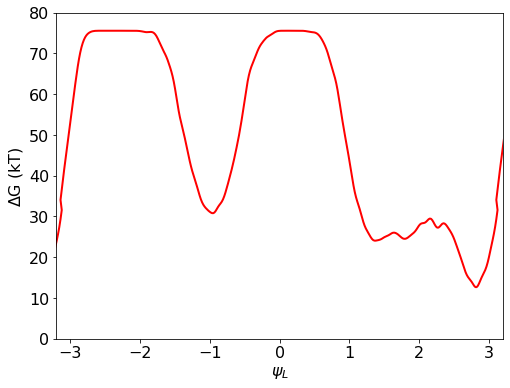

In [115]:
import numpy as np
import matplotlib.pyplot as plt

factor = 1/2.5 # convert kJ/mol to RT (310K)
x = np.genfromtxt('fes.dat', skip_header=9)

psi = x[:,0]
omega = x[:,1]
cis = np.where(omega == -3.141592654) #or this 3.123943257 
#cis = np.where(omega == -0.582430099)
psi = psi[cis]

fe = x[:,2]*factor
fe = fe[cis]
psi_p = np.concatenate((psi-2*psi.max(),psi,psi+2*psi.max()))
fe = np.tile(fe,3)

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
plt.plot(psi_p,fe, color='red', linewidth=2)
plt.xlabel(r'$\psi_L$')
plt.ylabel(r'$\Delta$G (kT)')
#plt.title('Cis- LD Leucine @ 328K')
plt.xlim([-3.2,3.2])
plt.ylim([0,80])
plt.savefig('ld_fes_psi_cis.png',dpi=300, bbox_inches='tight', facecolor='w')

## psi for cis and trans

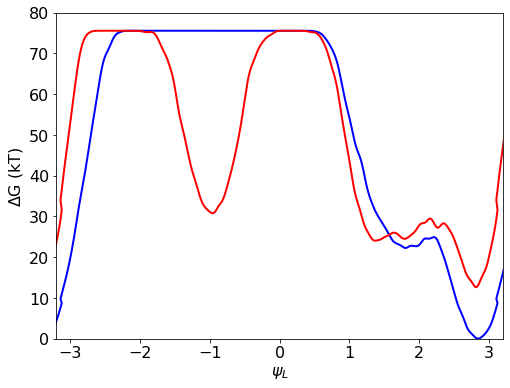

In [118]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
plt.plot(psi_p_t,fe_t, color='blue', linewidth=2)
plt.plot(psi_p,fe, color='red', linewidth=2)
plt.xlabel(r'$\psi_L$')
plt.ylabel(r'$\Delta$G (kT)')
plt.xlim([-3.2,3.2])
plt.ylim([0,80])
plt.savefig('ld_fes_psi_cis+trans.png',dpi=300, bbox_inches='tight', facecolor='w')

## psis for multiple omega

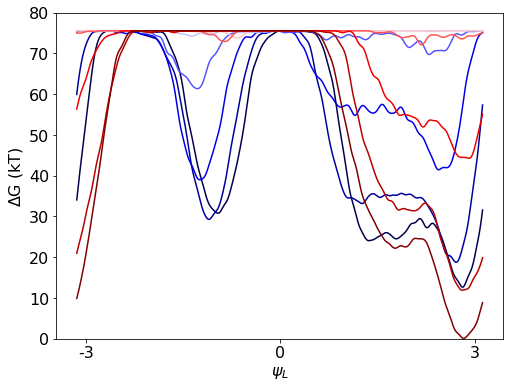

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
factor = 1/2.5 # convert kJ/mol to RT (310K)

x = np.genfromtxt('fes.dat', skip_header=9)[:,2]*factor
x = np.rot90(np.reshape(x,(int(x.shape[0]**0.5),int(x.shape[0]**0.5))))
#x = np.block([[x, x],[x, x]])

vals = np.floor(np.linspace(0,180,10)).astype(int)
custom_map = cm.get_cmap('seismic')
newcolors = custom_map(np.linspace(0,1,10))
#newcolors[-1,:]=[1, 1, 1, 1]
new_cmp = ListedColormap(newcolors)

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
for i in range(10):
    plt.plot(np.flip(x[:,vals[i]]), color=newcolors[i])

plt.xlabel(r'$\psi_L$')
plt.ylabel(r'$\Delta$G (kT)')
plt.xticks([8,178,348],['-3','0','3'])
#plt.title(r'Cis $\to$ Trans  LD Leucine @ 328K')
plt.ylim([0,80])
plt.savefig('ld_fes_psi_multiomega.png',dpi=300, bbox_inches='tight', facecolor='w')

# Plot fes with omega

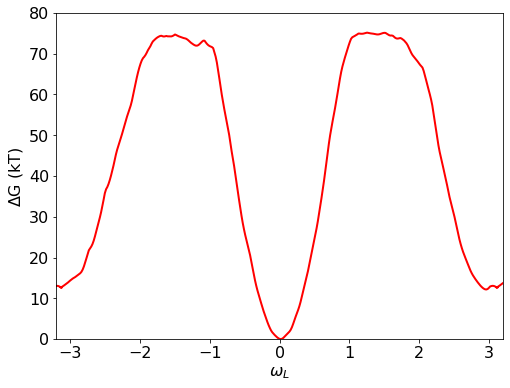

In [88]:
import numpy as np
import matplotlib.pyplot as plt

factor = 1/2.5 # convert kJ/mol to RT (310K)
x = np.genfromtxt('fes.dat', skip_header=9)
y = np.genfromtxt('fes.dat', skip_header=9)[:,2]*factor
y = np.rot90(np.reshape(y,(int(x.shape[0]**0.5),int(y.shape[0]**0.5))))

#omega = x[:,1]
#fe = x[:,2]*factor # this will plot all

omega = x[:356,0]
fe = y.min(axis=0)  # this will plot only the min
omega_p = np.concatenate((omega-2*omega.max(),omega,omega+2*omega.max()))
fe = np.tile(fe,3)

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
plt.plot(omega_p,fe, color='red', linewidth=2)
plt.xlabel(r'$\omega_L$')
plt.ylabel(r'$\Delta$G (kT)')
#plt.title('LD Leucine @ 328K')
plt.xlim([-3.2,3.2])
plt.ylim([0,80])
plt.savefig('ld_fes_omega.png',dpi=300, bbox_inches='tight', facecolor='w')

### 2

In [48]:
np.deg2rad(75)

1.3089969389957472

(0.0, 80.0)

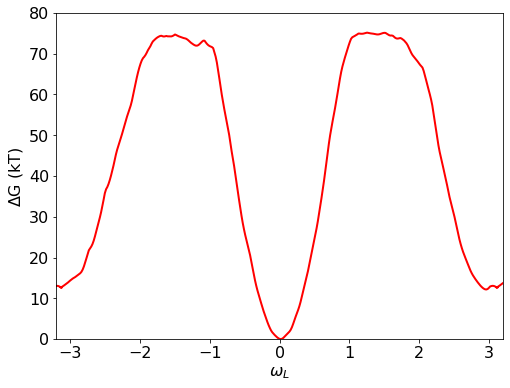

In [49]:
import numpy as np
import matplotlib.pyplot as plt

factor = 1/2.5 # convert kJ/mol to RT (310K)
x = np.genfromtxt('fes.dat', skip_header=9)
y = np.genfromtxt('fes.dat', skip_header=9)[:,2]*factor
y = np.rot90(np.reshape(y,(int(x.shape[0]**0.5),int(y.shape[0]**0.5))))

#omega = x[:,1]
#fe = x[:,2]*factor # this will plot all

omega = x[:356,0]
fe = y.min(axis=0)  # this will plot only the min
omega_p = np.concatenate((omega-2*omega.max(),omega,omega+2*omega.max()))
fe = np.tile(fe,3)

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
plt.plot(omega_p,fe, color='red', linewidth=2)
plt.xlabel(r'$\omega_L$')
plt.ylabel(r'$\Delta$G (kT)')
#plt.title('LD Leucine @ 328K')
plt.xlim([-3.2,3.2])
plt.ylim([0,80])
#plt.savefig('ld_fes_omega.png',dpi=300, bbox_inches='tight', facecolor='w')

# Minimum energy path

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm
from matplotlib.ticker import StrMethodFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.optimize import minimize

factor = 1/2.5 # convert kJ/mol to kT

x = np.genfromtxt('fes.dat', skip_header=9)[:,2]*factor
#x = np.rot90(np.reshape(x,(int(x.shape[0]**0.5),int(x.shape[0]**0.5))))
x = np.reshape(x,(int(x.shape[0]**0.5),int(x.shape[0]**0.5))).T
x = np.block([[x, x],[x, x]])
free_energy_surface = x[50:410,250:610]

<AxesSubplot:>

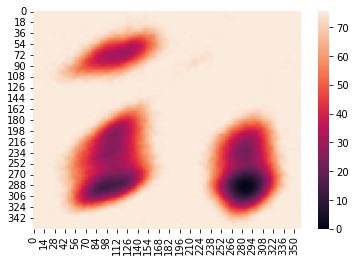

In [2]:
sns.heatmap(free_energy_surface)

In [9]:
def energy_at_point(coord):
    x = int(coord[0])
    y = int(coord[1])
    return free_energy_surface[x][y]

In [10]:
def energy_along_path(path):
    path_energy = 0
    for coord in path:
        path_energy += energy_at_point(coord)
    return path_energy

In [11]:
def forces_along_path(path):
    forces = np.zeros_like(path)
    for i, coord in enumerate(path):
        x = int(coord[0])
        y = int(coord[1])
        if x > 0:
            forces[i][0] += energy_at_point((x-1, y)) - energy_at_point((x, y))
        if x < free_energy_surface.shape[0] - 1:
            forces[i][0] += energy_at_point((x+1, y)) - energy_at_point((x, y))
        if y > 0:
            forces[i][1] += energy_at_point((x, y-1)) - energy_at_point((x, y))
        if y < free_energy_surface.shape[1] - 1:
            forces[i][1] += energy_at_point((x, y+1)) - energy_at_point((x, y))
    return forces

In [12]:
initial_coord = np.array([90,300])
final_coord = np.array([280,300])

In [13]:
n_images = 20
initial_path = [initial_coord + (final_coord - initial_coord) * i / (n_images - 1) for i in range(n_images)]

In [ ]:
res = minimize(energy_along_path, initial_path, args=(), method='L-BFGS-B', jac=forces_along_path)

In [17]:
int(initial_coord[0])

90